In [1]:
import re

def parse_lines(instr):
    pl = re.compile(r'target area: x=(\-?\d+)\.\.(\-?\d+), y=(\-?\d+)\.\.(\-?\d+)')
    matches = pl.match(instr)
    x_min, x_max, y_min, y_max = matches.groups()

    return (int(x_min), int(x_max)), (int(y_min), int(y_max))

In [73]:
import numpy as np

def signum(x):
    return 1 if x > 0 else -1 if x < 0 else 0

def x_step(x, vx):
    x += vx
    vx -= signum(vx)
    return x, vx

def y_step(x, vx):
    x += vx
    vx -= 1
    return x, vx

def find_x_intercepts(target_x):
    xmin, xmax = target_x
    xr = []

    for vx0 in range(1, xmin):
        vx = vx0
        x = [0]
        steps = 0
        while x[-1] < xmin and vx != 0:
            steps += 1
            x1, vx = x_step(x[-1], vx)
            x.append(x1)
        if xmin < x[-1] < xmax:
            xr.append((steps, vx0))

    return xr

def find_y_intercepts(target_y, t):
    # y = ut + 1/2*a*t^2
    # (y - 1/2*t^2) / t = u
    vy1 = (target_y[0] - (t**2)/2)/t
    vy2 = (target_y[1] - (t**2)/2)/t
    
    return vy1, vy2

def part1(input_str):
    x, y = parse_lines(input_str[0])
    t1, t2 = find_x_intercepts(x)
    print(t1, t2)
    vy1, vy2 = find_y_intercepts(y, t1)
    vy3, vy4 = find_y_intercepts(y, t2)
    print(vy1, vy2, vy3, vy4)    
    
    return 0

In [46]:
inputlist1 = [
    'target area: x=20..30, y=-10..-5',
]

# assert part1(inputlist1) == (6,9), 45 # Initial Velocity, Max height
print(part1(inputlist1))

6 8
-4.666666666666667 -3.8333333333333335 -5.25 -4.625
0


45


<IPython.core.display.Javascript object>


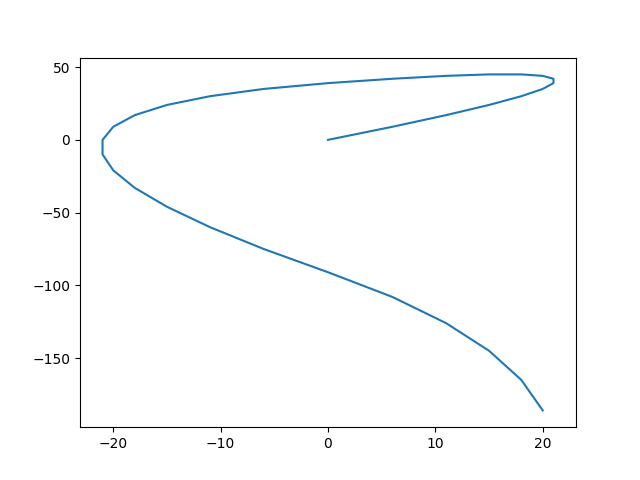

In [44]:
import matplotlib.pyplot as plt
%matplotlib notebook
x = [0]
y = [0]
vx = 6
vy = 9
while x[-1] < 20 or y[-1] > -10:
    x1, vx = x_step(x[-1], vx)
    y1, vy = y_step(y[-1], vy)
    x.append(x1)
    y.append(y1)
print(max(y))
plt.plot(x, y)
plt.show()

In [113]:
# xmin, xmax = 20, 30
xmin, xmax = 85, 145
xr = []

for vx0 in range(1, xmin):
    vx = vx0
    x = [0]
    steps = 0
    while vx != 0:
        steps += 1
        x1, vx = x_step(x[-1], vx)
        x.append(x1)
    if xmin <= x[-1] <= xmax:
        xr.append((steps, vx0))
print(xr)

[(13, 13), (14, 14), (15, 15), (16, 16)]


In [114]:
# ymin, ymax = -10, -5
ymin, ymax = -163, -108
times = set([t[0] for t in xr])
yr = []
ymax = 0

for vy0 in range(ymin, 1000):
    vy = vy0
    y = [0]
    for t in times:
        for step in range(1000):
            y1, vy = y_step(y[-1], vy)
            y.append(y1)
            if step >= t:
                if ymin <= y1 < ymax:
                    yr.append((step, vy0))
        
print(yr)


[(16, -1), (16, 0), (17, 0), (16, 1), (17, 1), (18, 1), (16, 2), (17, 2), (18, 2), (19, 2), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (16, 5), (17, 5), (18, 5), (19, 5), (20, 5), (21, 5), (22, 5), (23, 5), (16, 6), (17, 6), (18, 6), (19, 6), (20, 6), (21, 6), (22, 6), (23, 6), (24, 6), (16, 7), (17, 7), (18, 7), (19, 7), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (25, 7), (26, 7), (17, 8), (18, 8), (19, 8), (20, 8), (21, 8), (22, 8), (23, 8), (24, 8), (25, 8), (26, 8), (27, 8), (19, 9), (20, 9), (21, 9), (22, 9), (23, 9), (24, 9), (25, 9), (26, 9), (27, 9), (28, 9), (21, 10), (22, 10), (23, 10), (24, 10), (25, 10), (26, 10), (27, 10), (28, 10), (29, 10), (30, 10), (23, 11), (24, 11), (25, 11), (26, 11), (27, 11), (28, 11), (29, 11), (30, 11), (31, 11), (25, 12), (26, 12), (27, 12), (28, 12), (29, 12), (30, 12), (31, 12), (32, 12), (33, 12), (27, 13), (28, 13), (29, 13), (30, 13), (31, 13), (32, 13), (33, 13), (34, 13),

In [115]:
# plt.figure(2)
ymax = 0
for xentry in xr:
    for yentry in yr:
        xrun = [0]
        yrun = [0]
        vx = xentry[1]
        vy = yentry[1]
        for i in range(max([xentry[0],yentry[0]])):
            x1, vx = x_step(xrun[-1], vx)
            y1, vy = y_step(yrun[-1], vy)
            xrun.append(x1)
            yrun.append(y1)
            if y1 > ymax:
                ymax = y1
#         plt.plot(xrun, yrun, label=f'{xentry[1]}, {yentry[1]}')
# plt.legend()
# plt.show()
print(ymax)


13203


In [112]:
print(len(xr)*len(yr))

18


In [139]:
xmin, xmax = 20, 30
# xmin, xmax = 85, 145
xr = []

for vx0 in range(1, xmax+1):
    vx = vx0
    x = [0]
    steps = 0
    while vx != 0:
        steps += 1
        x1, vx = x_step(x[-1], vx)
        x.append(x1)
        if xmin <= x[-1] <= xmax:
            xr.append((steps, vx0))
print(xr)

[(5, 6), (6, 6), (4, 7), (5, 7), (6, 7), (7, 7), (3, 8), (4, 8), (5, 8), (3, 9), (4, 9), (3, 10), (2, 11), (3, 11), (2, 12), (2, 13), (2, 14), (2, 15), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30)]


In [127]:
ymin, ymax = -10, -5
# ymin, ymax = -163, -108
times = set([t[0] for t in xr])
yr = []
ymax = 0

for vy0 in range(ymin, 1000):
    vy = vy0
    y = [0]
    for t in times:
        for step in range(1000):
            y1, vy = y_step(y[-1], vy)
            y.append(y1)
            if step >= t:
                if ymin <= y1 < ymax:
                    yr.append((step, vy0))


{1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 19}


In [180]:
# xmin, xmax = 20, 30
xmin, xmax = 85, 145
# ymin, ymax = -10, -5
ymin, ymax = -163, -108
solns = set()
for vx0 in range(int(np.sqrt(85*2)+1), xmax+1):
    for vy0 in range(ymin, 5000):
        vx = vx0 
        vy = vy0
        x, y = 0, 0
        for i in range(5000):
            x, vx = x_step(x, vx)
            y, vy = y_step(y, vy)
            if ymin <= y <= ymax and xmin <= x <= xmax:
                solns.add((vx0, vy0))
            if x > xmax or y < ymin:
                break
len(solns) #5496

5496

In [166]:
print(solns)

{(126, -128), (106, -121), (102, -118), (59, -54), (102, -155), (15, 30), (126, -158), (121, -147), (26, -21), (36, -31), (64, -81), (144, -138), (107, -134), (50, -77), (23, -19), (112, -143), (17, -13), (47, -44), (27, -39), (98, -127), (51, -64), (98, -144), (13, 13), (14, -7), (122, -151), (65, -78), (38, -42), (85, -146), (132, -152), (16, 29), (119, -145), (100, -157), (62, -66), (137, -111), (124, -156), (29, -24), (110, -116), (90, -117), (87, -145), (134, -145), (43, -58), (110, -129), (67, -63), (101, -115), (30, -40), (138, -126), (134, -119), (128, -141), (101, -145), (115, -160), (96, -130), (129, -117), (120, -153), (25, -27), (135, -149), (130, -134), (103, -148), (97, -110), (16, -7), (46, -56), (50, -60), (97, -132), (14, 41), (107, -154), (141, -128), (23, -15), (37, -46), (51, -81), (61, -71), (131, -156), (94, -136), (142, -143), (99, -159), (109, -153), (71, -80), (89, -108), (85, -111), (28, -20), (142, -109), (133, -135), (42, -50), (113, -116), (109, -119), (66,

In [175]:
sum(range(14)) # n*(n-1)/2 = M

(91, 91.0)

In [177]:
int(np.sqrt(85*2)+1)

14